In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("Image1.txt")

In [3]:
df

,-3.0002,-3.0379,1
0,-2.56010,-4.003400,1
1,-3.03620,-3.491100,1
2,-3.68670,-1.745400,1
3,-2.88520,-3.376100,1
4,-0.83721,-0.594330,1
5,-2.83250,-2.385200,1
6,-3.31000,-2.007300,1
7,-2.77490,-1.082500,1
8,-2.80700,-5.149300,1
9,-3.31630,-3.298100,1


In [4]:
X=df.iloc[:,0:2].values
Y=df.iloc[:,2:3].values

In [5]:
y1=Y>1
y=y1.astype(int)

In [6]:
#m=y.size
#t=X
#X=np.hstack((np.matrix(np.ones(m).reshape(m,1)),t))
X

array([[-2.5601, -4.0034],
       [-3.0362, -3.4911],
       [-3.6867, -1.7454],
       ...,
       [ 1.3549,  2.9592],
       [ 1.8574,  3.6503],
       [ 2.9062,  2.305 ]])

In [7]:
y.shape

(9999, 1)

In [8]:
X.shape

(9999, 2)

In [9]:
y=y.ravel()

In [10]:
y

array([0, 0, 0, ..., 1, 1, 1])

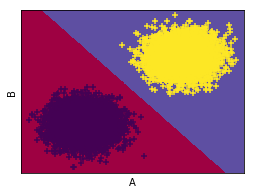

In [11]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Spectral)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y,marker = '+')
plt.xlabel('A')
plt.ylabel('B')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [12]:
import sklearn

# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)



LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [15]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [16]:
model = LogisticRegression(lr=0.1, num_iter=300000)
%time model.fit(X,y)

/home/anjali/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/home/anjali/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


CPU times: user 5min 46s, sys: 6.38 s, total: 5min 52s
Wall time: 2min 56s


In [17]:
preds = model.predict(X)
(preds == y).mean()

1.0

In [18]:
model.theta

array([0.07571001, 3.25791544, 3.09916668])

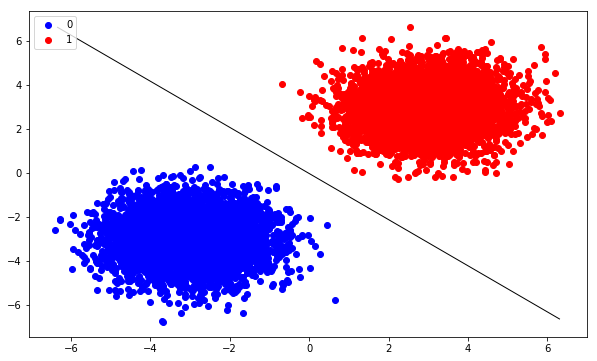

In [19]:


plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');



In [20]:
X.shape

(9999, 2)

In [21]:
model.theta.shape

(3,)